In [17]:
import numpy as np
import pandas as pd
import warnings
from plotnine import *

In [18]:
warnings.filterwarnings('ignore')

In [19]:
# 读入汽车数据
auto_data=pd.read_csv('../../dataset/Auto.csv')
print(auto_data.shape)
print(auto_data.columns)
auto_data.head()

(392, 8)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [20]:
auto_data.info() #查看列名称，数据类型，数据类型，缺失值情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


In [21]:
auto_data.describe() #查看数据的统计信息

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 数据预处理

缺失值处理：KMeans算法不能处理缺失值，因此需要对数据集中的缺失值进行处理。常见的处理方法包括删除含有缺失值的行，或者使用某种方法（如平均值、中位数、众数等）填充缺失值。  

数值标准化：由于KMeans算法是基于距离的算法，不同的特征尺度可能会影响聚类结果。因此，通常需要对数值特征进行标准化处理，使得所有特征都在同一尺度上。常见的标准化方法包括Z-score标准化和Min-Max标准化。  

离群值处理：离群值可能会影响KMeans的聚类结果，因此需要对离群值进行处理。处理方法包括删除离群值，或者使用某种方法（如分位数）替换离群值。  

特征选择：如果数据集中包含的特征过多，可能会导致“维度灾难”，影响聚类结果。因此，可能需要进行特征选择，只保留对聚类结果影响最大的特征。 


- 使用z-score标准化来处理连续变量
- 使用(哑变量)one-hot编码来处理分类变量

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

cols=['mpg','displacement','horsepower','weight','acceleration']
auto_data[cols]=scaler.fit_transform(auto_data[cols])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.698638,8,1.077290,0.664133,0.620540,-1.285258,70,1
1,-1.083498,8,1.488732,1.574594,0.843334,-1.466724,70,1
2,-0.698638,8,1.182542,1.184397,0.540382,-1.648189,70,1
3,-0.955212,8,1.048584,1.184397,0.536845,-1.285258,70,1
4,-0.826925,8,1.029447,0.924265,0.555706,-1.829655,70,1


In [23]:
auto_scaled=pd.get_dummies(auto_data,columns=['cylinders','year','origin'])
auto_scaled.head(29)

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
0,-0.698638,1.077290,0.664133,0.620540,-1.285258,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.083498,1.488732,1.574594,0.843334,-1.466724,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.698638,1.182542,1.184397,0.540382,-1.648189,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.955212,1.048584,1.184397,0.536845,-1.285258,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.826925,1.029447,0.924265,0.555706,-1.829655,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,-1.083498,2.244637,2.433030,1.607198,-2.011120,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,-1.211785,2.483848,3.005320,1.622523,-2.374052,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,-1.211785,2.349890,2.875254,1.573013,-2.555517,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,-1.211785,2.493416,3.135386,1.706218,-2.011120,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,-1.083498,1.871469,2.224924,1.028406,-2.555517,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## k-means聚类

人工给出初始质心

随机选择初始质心

该方法容易陷进局部最优解，不容易得到最优的聚类结果

- 改进上述情况可采取下列方案：
    - 多次运行K-Means算法，每次随机选择不同的初始质心，从这些结果中选择最优（目标函数最小）的聚类结果
    - 使用K-Means++算法来初始化质心，主要思路是选择的初始质心尽可能的互相远离


In [24]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=111).fit(auto_scaled)

In [25]:
auto_label=model.labels_
auto_cluster=model.cluster_centers_
print(auto_label.shape)
print(type(auto_cluster))
print(auto_cluster)# 每个簇的质心
auto_label #划分的簇标签

(392,)
<class 'numpy.ndarray'>
[[ 7.32414377e-01 -8.15600964e-01 -6.72310897e-01 -7.81941505e-01
   3.65282427e-01  1.95121951e-02  9.70731707e-01  4.87804878e-03
   4.87804878e-03 -4.44089210e-16  3.41463415e-02  5.85365854e-02
   7.31707317e-02  5.85365854e-02  7.31707317e-02  5.85365854e-02
   7.31707317e-02  7.31707317e-02  8.29268293e-02  5.85365854e-02
   1.21951220e-01  1.02439024e-01  1.31707317e-01  3.36585366e-01
   3.07317073e-01  3.56097561e-01]
 [-1.14817607e+00  1.48145570e+00  1.49059354e+00  1.38352033e+00
  -1.05540156e+00 -8.67361738e-18  1.11022302e-15 -2.60208521e-18
  -2.77555756e-17  1.00000000e+00  1.87500000e-01  7.29166667e-02
   1.35416667e-01  2.08333333e-01  5.20833333e-02  5.20833333e-02
   9.37500000e-02  7.29166667e-02  5.20833333e-02  7.29166667e-02
  -4.16333634e-17  2.77555756e-17 -8.32667268e-17  1.00000000e+00
   2.22044605e-16 -1.94289029e-16]
 [-4.38681804e-01  2.74488464e-01 -5.79477555e-02  3.01978649e-01
   2.90501668e-01 -8.67361738e-18  4.4408

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,

### 聚类结果可视化
绘制柱状图

In [26]:
auto_label_dataframe=pd.DataFrame({'clusters':auto_label})
auto_label_dataframe['clusters'] = auto_label_dataframe['clusters'].astype('category')
auto_label_dataframe.shape

(392, 1)

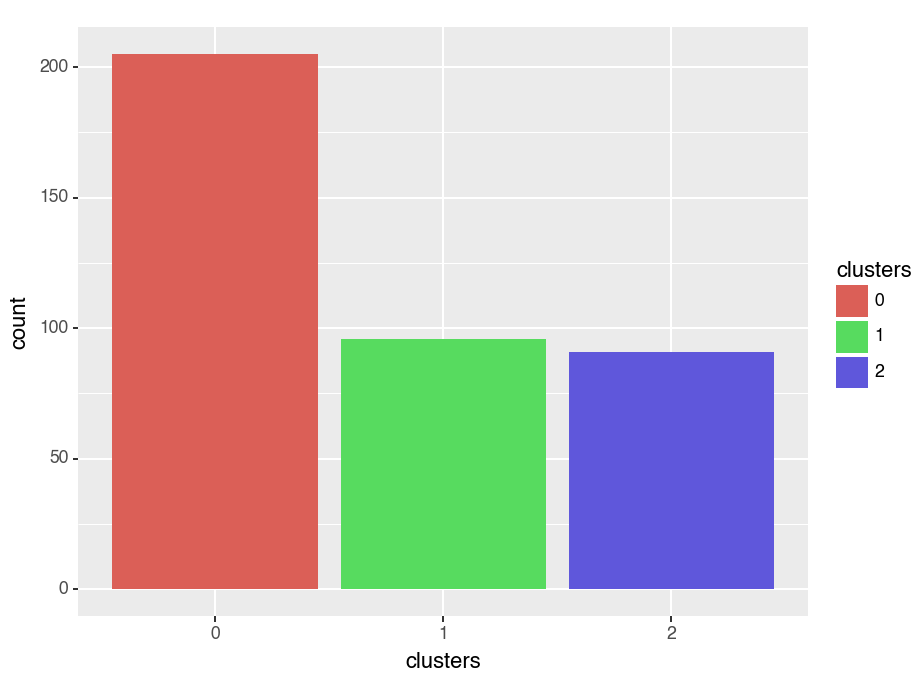

<Figure Size: (460 x 345)>

In [27]:
ggplot(auto_label_dataframe,aes('clusters',fill='clusters')) + geom_bar()

### 将数据进行逆标准化，输出聚类的结果,查看每个簇的特征

In [28]:
centrl_cluster=pd.DataFrame(auto_cluster).copy().iloc[:,:5]# 前5列为连续变量
cols=['mpg','displacement','horsepower','weight','acceleration']
centrl_cluster.columns=cols
# 逆标准化
centrl_cluster_inverse_scale=pd.DataFrame(scaler.inverse_transform(centrl_cluster))
centrl_cluster_inverse_scale.columns=cols
centrl_cluster_inverse_scale=centrl_cluster_inverse_scale.applymap(lambda x:'%.2f'%x)
print(centrl_cluster_inverse_scale.dtypes)

# 查看每个簇的特征
print(centrl_cluster_inverse_scale)

mpg             object
displacement    object
horsepower      object
weight          object
acceleration    object
dtype: object
     mpg displacement horsepower   weight acceleration
0  29.16       109.17      78.62  2314.25        16.55
1  14.50       349.24     161.77  4151.25        12.63
2  20.03       223.10     102.24  3233.76        16.34


从聚类结果我们可以看到，当把数据聚成三个簇时，各个簇的主要特点如下：
簇0：耗油量小，引擎排量小，引擎马力小，重量轻，加速性能差

簇1：耗油量大，引擎排量大，引擎马力大，重量重，加速性能强

簇2：耗油量中等，引擎排量中等，引擎马力中等，重量中等，加速性能较差

### 使用轮廓系数来评估聚类效果
对于每个样本，轮廓系数需要计算两个值$a,b$：<br>
- $a$:这个样本和同簇内其它样本间的平均距离
- $b$:这个样本和距离第二近的簇内所有样本间的平均距离
- 单个样本的轮廓系数计算如下：$s = \frac{b - a}{\max(a, b)}$     
- 所有样本的轮廓系数则由每个样本的轮廓系数求平均得到


**轮廓系数取值在-1到1之间，越接近1说明聚类效果越好**


In [29]:
from sklearn import metrics
print('k=3的轮廓系数(Silhouette Coefficient) %.4f'% metrics.silhouette_score(auto_scaled,auto_label))
# 选择不同的k值，比较聚类的效果
for i in range(2,8):
    if i is 3:
        continue
    model=KMeans(n_clusters=i,random_state=111).fit(auto_scaled)
    print('k=%d的轮廓系数(Silhouette Coefficient) %.4f'%(i,metrics.silhouette_score(auto_scaled,model.labels_)))
    

k=3的轮廓系数(Silhouette Coefficient) 0.3183
k=2的轮廓系数(Silhouette Coefficient) 0.4152
k=4的轮廓系数(Silhouette Coefficient) 0.2543
k=5的轮廓系数(Silhouette Coefficient) 0.2502
k=6的轮廓系数(Silhouette Coefficient) 0.2012
k=7的轮廓系数(Silhouette Coefficient) 0.2132


结果分析：分成两类的效果最好
